In [70]:
import torch
from torch import nn

import math
import matplotlib.pyplot as plt

In [71]:
torch.manual_seed(111)

In [72]:
train_data_length = 2048
train_data = torch.zeros((train_data_length,2))
train_data[:,0]= 2*math.pi*torch.rand(train_data_length)
train_data[:,1]= torch.cos(train_data[:,0])
train_labels = torch.zeros(train_data_length)
train_set = [
    (train_data[i],train_labels[i])for i in range(train_data_length)
]

In [73]:
train_set

[(tensor([ 4.4960, -0.2147]), tensor(0.)),
 (tensor([5.7428, 0.8575]), tensor(0.)),
 (tensor([ 1.7710, -0.1988]), tensor(0.)),
 (tensor([ 1.6217, -0.0509]), tensor(0.)),
 (tensor([ 3.9654, -0.6795]), tensor(0.)),
 (tensor([ 3.7702, -0.8088]), tensor(0.)),
 (tensor([5.8509, 0.9080]), tensor(0.)),
 (tensor([1.3527, 0.2164]), tensor(0.)),
 (tensor([ 3.7905, -0.7967]), tensor(0.)),
 (tensor([ 4.6042, -0.1080]), tensor(0.)),
 (tensor([1.1669, 0.3930]), tensor(0.)),
 (tensor([ 3.2048, -0.9980]), tensor(0.)),
 (tensor([4.7404, 0.0280]), tensor(0.)),
 (tensor([ 1.8120, -0.2389]), tensor(0.)),
 (tensor([ 3.6283, -0.8839]), tensor(0.)),
 (tensor([0.2252, 0.9747]), tensor(0.)),
 (tensor([0.6448, 0.7992]), tensor(0.)),
 (tensor([ 2.1483, -0.5459]), tensor(0.)),
 (tensor([ 2.7645, -0.9297]), tensor(0.)),
 (tensor([ 3.9842, -0.6655]), tensor(0.)),
 (tensor([ 3.9106, -0.7186]), tensor(0.)),
 (tensor([ 3.9801, -0.6686]), tensor(0.)),
 (tensor([5.3908, 0.6276]), tensor(0.)),
 (tensor([0.9877, 0.5506]),

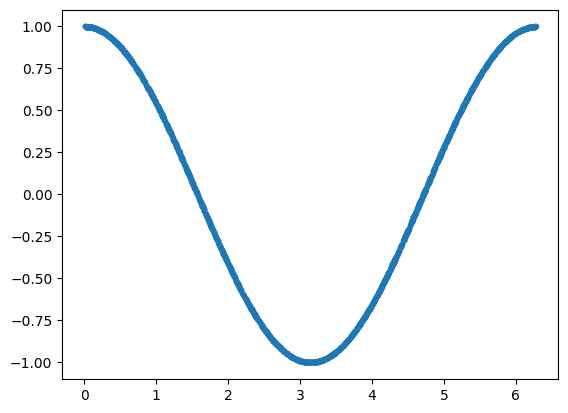

In [74]:
plt.plot(train_data[:,0],train_data[:,1], ".")

In [75]:
batch_size = 64
train_loader = torch.utils.data.DataLoader(
    train_set,batch_size=batch_size , shuffle=True
)

In [76]:
train_loader

In [77]:
class Discriminator(nn.Module):
  def __init__(self):
    super().__init__()
    self.model = nn.Sequential(
        nn.Linear(2,556),
        nn.ReLU(),
        nn.Dropout(0.3),
        nn.Linear(556,128),
        nn.ReLU(),
        nn.Dropout(0,3),
        nn.Linear(128, 128),
        nn.ReLU(),
        nn.Dropout(0.3),
        nn.Linear(128, 64),
        nn.ReLU(),
        nn.Dropout(0.3),
        nn.Linear(64, 1),
        nn.Sigmoid(),
    )

  def forward(self,x):
    output = self.model(x)
    return output

In [78]:
discriminator = Discriminator()

In [79]:
class Generator(nn.Module):
  def __init__(self):
    super().__init__()
    self.model = nn.Sequential(
        nn.Linear(2,16),
        nn.ReLU(),
        nn.Linear(16,32),
        nn.ReLU(),
        nn.Linear(32,2),
    )

  def forward(self,x):
    output = self.model(x)
    return output

In [80]:
generator = Generator()

In [81]:
lr = 0.001
num_epochs = 300
loss_function = nn.BCELoss()

In [82]:
optimizer_discriminator = torch.optim.Adam(discriminator.parameters(), lr=lr)
optimizer_generator = torch.optim.Adam(generator.parameters(), lr=lr)

In [86]:
for epoch in range(num_epochs):
  for n, (real_samples, _)in enumerate(train_loader):
    #Data for training the discriminator
    real_sample_labels = torch.ones((batch_size,1))
    latent_space_samples = torch.randn((batch_size,2))
    generated_samples = generator(latent_space_samples)
    generated_sample_labels = torch.zeros((batch_size,1))
    all_samples = torch.cat((real_samples,generated_samples))
    all_samples_labels = torch.cat(
        (real_sample_labels,generated_sample_labels)
    )

    # Training the discriminator
    discriminator.zero_grad()
    output_discriminator = discriminator(all_samples)
    loss_discriminator = loss_function(
    output_discriminator, all_samples_labels)
    loss_discriminator.backward()
    optimizer_discriminator.step()


    # Data for training the generator
    latent_space_samples = torch.randn((batch_size, 2))

    # Training the generator
    generator.zero_grad()
    generated_samples = generator(latent_space_samples)
    output_discriminator_generated = discriminator(generated_samples)
    loss_generator = loss_function(
      output_discriminator_generated, real_sample_labels
    )
    loss_generator.backward()
    optimizer_generator.step()



In [87]:
latent_space_samples = torch.randn(500, 2)
generated_samples = generator(latent_space_samples)

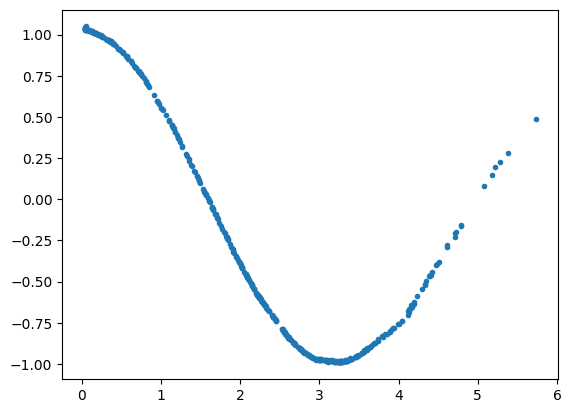

In [88]:
generated_samples = generated_samples.detach()
plt.plot(generated_samples[:, 0], generated_samples[:, 1], ".")